## Seattle crime data analysis and modeling

In [2]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import datetime

import os
os.environ["PYSPARK_PYTHON"] = "python3"
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


In [3]:
# The dataset used below is the sampled data containing 41211 rows from the full dataset containing 824220 rows, both of them have 17 columns 

# File location and type
file_location = "/FileStore/tables/sample.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. 
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

_c0,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
128037,2017-063169,7670730755,2017-02-20T20:10:00.000+0000,null,2017-02-21T02:07:00.000+0000,B,SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,90J,N,N,N3,NORTHGATE,100XX BLOCK OF AURORA AVE N,-122.344655369,47.701792100000006
491755,2017-331849,7689232987,2017-09-06T03:15:00.000+0000,2017-09-06T18:47:00.000+0000,2017-09-06T18:47:00.000+0000,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,D,D1,BELLTOWN,25XX BLOCK OF 1ST AVE,-122.349213984,47.61497245
470924,2018-049793,7632501305,2015-08-27T13:16:00.000+0000,2018-02-02T13:00:00.000+0000,2018-02-09T13:16:00.000+0000,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,SW,W,W1,ALASKA JUNCTION,38XX BLOCK OF 34TH AVE SW,-122.375060686,47.56897088
791624,2011-107900,7696250874,2011-04-04T17:36:00.000+0000,null,2011-04-04T17:36:00.000+0000,B,SOCIETY,"FAMILY OFFENSES, NONVIOLENT","Family Offenses, Nonviolent",90F,E,G,G2,CENTRAL AREA/SQUIRE PARK,null,0.0,0.0
491263,2017-337086,7632225671,2017-09-10T14:31:00.000+0000,null,2017-09-10T14:31:00.000+0000,A,SOCIETY,WEAPON LAW VIOLATIONS,Weapon Law Violations,520,W,K,K2,DOWNTOWN COMMERCIAL,5XX BLOCK OF 3RD AVE,-122.331082199,47.60241242
371403,2019-157861,8195256574,2019-05-03T13:42:00.000+0000,null,2019-05-03T13:42:00.000+0000,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,N,L,L3,LAKECITY,null,0.0,0.0
73349,2008-453673,7628791651,2008-12-04T22:52:00.000+0000,null,2008-12-04T22:52:00.000+0000,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,E,C,C3,CENTRAL AREA/SQUIRE PARK,null,0.0,0.0
117583,2019-383508,11124533051,2019-10-14T16:30:00.000+0000,null,2019-10-14T16:41:26.000+0000,B,SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,90J,E,C,C3,CENTRAL AREA/SQUIRE PARK,17XX BLOCK OF 16TH AVE,-122.311450327,47.61702955
21440,2010-012052,7699860990,2010-01-11T12:00:00.000+0000,2010-01-11T17:00:00.000+0000,2010-01-11T18:07:00.000+0000,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,W,D,D1,SLU/CASCADE,21XX BLOCK OF 4TH AVE,-122.341983607,47.61421579
229520,2014-419807,7651431582,2014-12-20T01:18:00.000+0000,null,2014-12-20T01:18:00.000+0000,A,PERSON,ASSAULT OFFENSES,Simple Assault,13B,N,U,U2,UNIVERSITY,7XX BLOCK OF NE 45TH ST,-122.32025036799999,47.66131587


## Data Overview and Preprocessing

In [5]:
# create a view of data 
df.createOrReplaceTempView("seattle_crime")
# Data Overview and Preprocessing 
df.printSchema()
temp_table = "sample_csv"
# It's nice that the datatime is already in timestamp type

root
-- _c0: integer (nullable = true)
-- Report Number: string (nullable = true)
-- Offense ID: long (nullable = true)
-- Offense Start DateTime: timestamp (nullable = true)
-- Offense End DateTime: timestamp (nullable = true)
-- Report DateTime: timestamp (nullable = true)
-- Group A B: string (nullable = true)
-- Crime Against Category: string (nullable = true)
-- Offense Parent Group: string (nullable = true)
-- Offense: string (nullable = true)
-- Offense Code: string (nullable = true)
-- Precinct: string (nullable = true)
-- Sector: string (nullable = true)
-- Beat: string (nullable = true)
-- MCPP: string (nullable = true)
-- 100 Block Address: string (nullable = true)
-- Longitude: double (nullable = true)
-- Latitude: double (nullable = true)

In [6]:
# Drop columns those are not directly meaningful for this analysis, and rename remaining columns by intuitive ones 
# Handle Missing Value: the column 
df = df.drop("_c0","Precinct","Sector","Beat")
df = df.toDF('ReportNumber','OffenseID', 'StartTime', 'EndTime', 'ReportTime', 'A/B', 'Category', 'ParentGroup', 'OffenseName', 'OffenseCode', 'District', 'Address', 'Longitude', 'Latitude')
display(df)
df.createOrReplaceTempView("new_crime")

ReportNumber,OffenseID,StartTime,EndTime,ReportTime,A/B,Category,ParentGroup,OffenseName,OffenseCode,District,Address,Longitude,Latitude
2017-063169,7670730755,2017-02-20T20:10:00.000+0000,null,2017-02-21T02:07:00.000+0000,B,SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,90J,NORTHGATE,100XX BLOCK OF AURORA AVE N,-122.344655369,47.701792100000006
2017-331849,7689232987,2017-09-06T03:15:00.000+0000,2017-09-06T18:47:00.000+0000,2017-09-06T18:47:00.000+0000,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,BELLTOWN,25XX BLOCK OF 1ST AVE,-122.349213984,47.61497245
2018-049793,7632501305,2015-08-27T13:16:00.000+0000,2018-02-02T13:00:00.000+0000,2018-02-09T13:16:00.000+0000,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,ALASKA JUNCTION,38XX BLOCK OF 34TH AVE SW,-122.375060686,47.56897088
2011-107900,7696250874,2011-04-04T17:36:00.000+0000,null,2011-04-04T17:36:00.000+0000,B,SOCIETY,"FAMILY OFFENSES, NONVIOLENT","Family Offenses, Nonviolent",90F,CENTRAL AREA/SQUIRE PARK,null,0.0,0.0
2017-337086,7632225671,2017-09-10T14:31:00.000+0000,null,2017-09-10T14:31:00.000+0000,A,SOCIETY,WEAPON LAW VIOLATIONS,Weapon Law Violations,520,DOWNTOWN COMMERCIAL,5XX BLOCK OF 3RD AVE,-122.331082199,47.60241242
2019-157861,8195256574,2019-05-03T13:42:00.000+0000,null,2019-05-03T13:42:00.000+0000,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,LAKECITY,null,0.0,0.0
2008-453673,7628791651,2008-12-04T22:52:00.000+0000,null,2008-12-04T22:52:00.000+0000,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,CENTRAL AREA/SQUIRE PARK,null,0.0,0.0
2019-383508,11124533051,2019-10-14T16:30:00.000+0000,null,2019-10-14T16:41:26.000+0000,B,SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,90J,CENTRAL AREA/SQUIRE PARK,17XX BLOCK OF 16TH AVE,-122.311450327,47.61702955
2010-012052,7699860990,2010-01-11T12:00:00.000+0000,2010-01-11T17:00:00.000+0000,2010-01-11T18:07:00.000+0000,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,SLU/CASCADE,21XX BLOCK OF 4TH AVE,-122.341983607,47.61421579
2014-419807,7651431582,2014-12-20T01:18:00.000+0000,null,2014-12-20T01:18:00.000+0000,A,PERSON,ASSAULT OFFENSES,Simple Assault,13B,UNIVERSITY,7XX BLOCK OF NE 45TH ST,-122.32025036799999,47.66131587


In [7]:
%sql select count(*)
from new_crime
where EndTime is null;
-- 19866 out of 41211 End Time were missed, so exclude this column 


count(1)
19866


In [8]:
df = df.drop("EndTime")
display(df)
df.createOrReplaceTempView("new_crime1")


ReportNumber,OffenseID,StartTime,ReportTime,A/B,Category,ParentGroup,OffenseName,OffenseCode,District,Address,Longitude,Latitude
2017-063169,7670730755,2017-02-20T20:10:00.000+0000,2017-02-21T02:07:00.000+0000,B,SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,90J,NORTHGATE,100XX BLOCK OF AURORA AVE N,-122.344655369,47.701792100000006
2017-331849,7689232987,2017-09-06T03:15:00.000+0000,2017-09-06T18:47:00.000+0000,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,BELLTOWN,25XX BLOCK OF 1ST AVE,-122.349213984,47.61497245
2018-049793,7632501305,2015-08-27T13:16:00.000+0000,2018-02-09T13:16:00.000+0000,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,ALASKA JUNCTION,38XX BLOCK OF 34TH AVE SW,-122.375060686,47.56897088
2011-107900,7696250874,2011-04-04T17:36:00.000+0000,2011-04-04T17:36:00.000+0000,B,SOCIETY,"FAMILY OFFENSES, NONVIOLENT","Family Offenses, Nonviolent",90F,CENTRAL AREA/SQUIRE PARK,null,0.0,0.0
2017-337086,7632225671,2017-09-10T14:31:00.000+0000,2017-09-10T14:31:00.000+0000,A,SOCIETY,WEAPON LAW VIOLATIONS,Weapon Law Violations,520,DOWNTOWN COMMERCIAL,5XX BLOCK OF 3RD AVE,-122.331082199,47.60241242
2019-157861,8195256574,2019-05-03T13:42:00.000+0000,2019-05-03T13:42:00.000+0000,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,LAKECITY,null,0.0,0.0
2008-453673,7628791651,2008-12-04T22:52:00.000+0000,2008-12-04T22:52:00.000+0000,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,CENTRAL AREA/SQUIRE PARK,null,0.0,0.0
2019-383508,11124533051,2019-10-14T16:30:00.000+0000,2019-10-14T16:41:26.000+0000,B,SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,90J,CENTRAL AREA/SQUIRE PARK,17XX BLOCK OF 16TH AVE,-122.311450327,47.61702955
2010-012052,7699860990,2010-01-11T12:00:00.000+0000,2010-01-11T18:07:00.000+0000,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,SLU/CASCADE,21XX BLOCK OF 4TH AVE,-122.341983607,47.61421579
2014-419807,7651431582,2014-12-20T01:18:00.000+0000,2014-12-20T01:18:00.000+0000,A,PERSON,ASSAULT OFFENSES,Simple Assault,13B,UNIVERSITY,7XX BLOCK OF NE 45TH ST,-122.32025036799999,47.66131587


In [9]:
%sql select count(*)
from new_crime
where Address is null;
-- Otherwise, 1519 address were missed, but no District is missed, here we ignore the missing values of Address. 

count(1)
1519


#### Section 1 OLAP:

In [11]:
BigCategory = df.groupBy('Category').count().orderBy('count', ascending=False)
display(BigCategory)

Category,count
PROPERTY,30384
PERSON,6228
SOCIETY,4599


In [12]:
ParentCategory = df.groupBy('ParentGroup').count().orderBy('count', ascending=False)
display(ParentCategory)

ParentGroup,count
LARCENY-THEFT,15600
ASSAULT OFFENSES,5888
BURGLARY/BREAKING&ENTERING,4429
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,3780
MOTOR VEHICLE THEFT,2445
FRAUD OFFENSES,2164
TRESPASS OF REAL PROPERTY,1307
DRUG/NARCOTIC OFFENSES,1271
ROBBERY,957
DRIVING UNDER THE INFLUENCE,703


In [13]:
%sql
select count(distinct(ParentGroup))
from new_crime1
-- see how many parent groups in total 

count(DISTINCT ParentGroup)
30


In [14]:
BothGroup = df.groupBy('Category','ParentGroup').count().orderBy('count', ascending=False)
display(BothGroup)

Category,ParentGroup,count
PROPERTY,LARCENY-THEFT,15600
PERSON,ASSAULT OFFENSES,5888
PROPERTY,BURGLARY/BREAKING&ENTERING,4429
PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,3780
PROPERTY,MOTOR VEHICLE THEFT,2445
PROPERTY,FRAUD OFFENSES,2164
SOCIETY,TRESPASS OF REAL PROPERTY,1307
SOCIETY,DRUG/NARCOTIC OFFENSES,1271
PROPERTY,ROBBERY,957
SOCIETY,DRIVING UNDER THE INFLUENCE,703


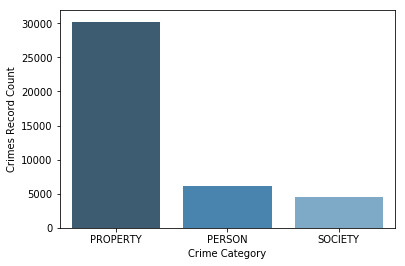

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt

# Histogram of count w.r.t Category
crimes_pd_df1 = BigCategory.toPandas()
fig, ax = plt.subplots()
sb.set(style="whitegrid")
type_graph = sb.barplot(y='count', x='Category', data=crimes_pd_df1.head(10), palette="Blues_d")
type_graph.set(xlabel="Crime Category", ylabel="Crimes Record Count")
display(fig)


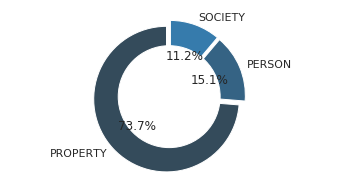

In [17]:
# Pie chart
labels = crimes_pd_df1['Category'].values
sizes = crimes_pd_df1['count'].values
#colors
colors = sb.color_palette("Blues_d")
#explsion
explode = (0.05,0.05,0.05)

fig1, ax1 = plt.subplots()
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.55, explode = explode)
plt.rcParams.update({'font.size': 50})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
display()

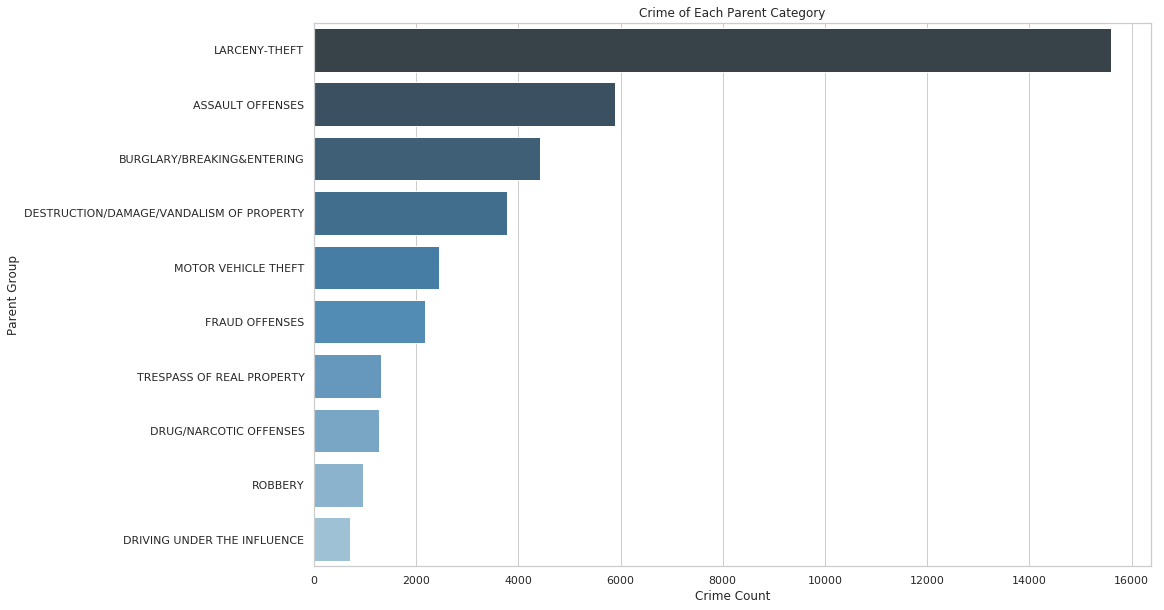

In [18]:
crimes_pd_df2 = ParentCategory.toPandas()
type_graph, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [15, 10]
sb.set(style="whitegrid")
type_graph = sb.barplot(x='count', y='ParentGroup', data=crimes_pd_df2.head(10),palette="Blues_d")
type_graph.set(ylabel="Parent Group", xlabel="Crime Count")
plt.title("Crime of Each Parent Category")
display(type_graph)

In [19]:
package_path = "dbfs:/FileStore/jars/61ba8244_f84e_4e71_9a3e_c496f9512346/plotly-4.6.0-py2.py3-none-any.whl"
import plotly.express as px 

crimes_pd_df3 = BothGroup.toPandas()
fig = px.sunburst(crimes_pd_df3,path=['Category','ParentGroup'], values = 'count',color='Category',
                 color_discrete_map={'PROPERTY':'Purple', 'PERSON':'Orchid', 'SOCIETY':'Plum'})
plt.rcParams["figure.figsize"] = [200,200]
fig.show()

--------------------------------------------------------------------------- 
 ModuleNotFoundError Traceback (most recent call last)
 <command-4086940269220175> in <module> 
 1 package_path = "dbfs:/FileStore/jars/61ba8244_f84e_4e71_9a3e_c496f9512346/plotly-4.6.0-py2.py3-none-any.whl" 
 ----> 2 import plotly . express as px
 3 
 4 crimes_pd_df3 = BothGroup . toPandas ( ) 
 5 fig = px.sunburst(crimes_pd_df3,path=['Category','ParentGroup'], values = 'count',color='Category',

 ModuleNotFoundError : No module named 'plotly'

Counts the number of crimes for different district

In [21]:
District = df.groupBy('District').count().orderBy('count', ascending=False)
display(District)

District,count
DOWNTOWN COMMERCIAL,3543
CAPITOL HILL,2535
NORTHGATE,2295
QUEEN ANNE,2003
SLU/CASCADE,1805
UNIVERSITY,1570
ROOSEVELT/RAVENNA,1429
BALLARD SOUTH,1225
FIRST HILL,1189
LAKECITY,1161


In [22]:
%sql
select count(distinct(District))
from new_crime1
-- see how many districts in total 

count(DISTINCT District)
59


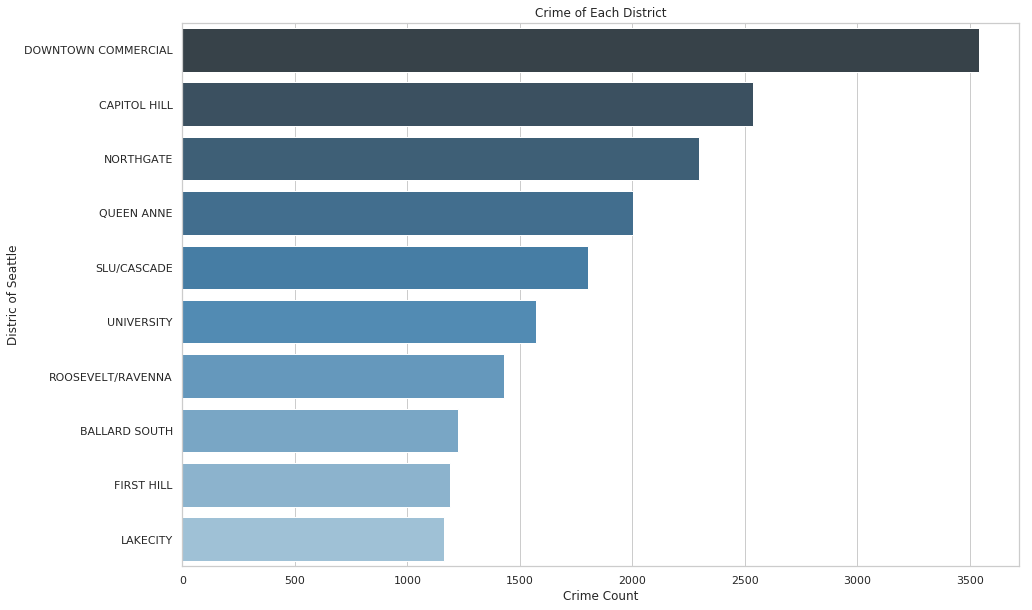

In [23]:
import matplotlib.pyplot as plt
import seaborn as sb
Area_Crime = District.toPandas()
type_graph, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [15, 10]
sb.set(style="whitegrid")
type_graph = sb.barplot(x='count', y='District', data=Area_Crime.head(10),palette="Blues_d")
type_graph.set(ylabel="Distric of Seattle", xlabel="Crime Count")
plt.title("Crime of Each District")
display(type_graph)

Count the number of crimes each "Sunday" at "SF downtown".

In [25]:
from pyspark.sql.functions import to_date, to_timestamp, year, month, hour, dayofweek
import datetime

# Split the start time into year, month, date, and hour to see patterns.
df1 = df.withColumn('Date', to_date('StartTime'))
df2 = df1.withColumn('Hour', hour(df['StartTime']))
#df1 = df.withColumn('YEAR', year('Date')) 
#df1 = df.withColumn('MONTH', month('Date'))
df3 = df2.withColumn('DAYOFWEEK', dayofweek('Date')) #Extract the day of the week of a given date as integer.
display(df3)
#df.printSchema()


ReportNumber,OffenseID,StartTime,ReportTime,A/B,Category,ParentGroup,OffenseName,OffenseCode,District,Address,Longitude,Latitude,Date,Hour,DAYOFWEEK
2017-063169,7670730755,2017-02-20T20:10:00.000+0000,2017-02-21T02:07:00.000+0000,B,SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,90J,NORTHGATE,100XX BLOCK OF AURORA AVE N,-122.344655369,47.701792100000006,2017-02-20,20,2
2017-331849,7689232987,2017-09-06T03:15:00.000+0000,2017-09-06T18:47:00.000+0000,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,BELLTOWN,25XX BLOCK OF 1ST AVE,-122.349213984,47.61497245,2017-09-06,3,4
2018-049793,7632501305,2015-08-27T13:16:00.000+0000,2018-02-09T13:16:00.000+0000,A,PROPERTY,FRAUD OFFENSES,Wire Fraud,26E,ALASKA JUNCTION,38XX BLOCK OF 34TH AVE SW,-122.375060686,47.56897088,2015-08-27,13,5
2011-107900,7696250874,2011-04-04T17:36:00.000+0000,2011-04-04T17:36:00.000+0000,B,SOCIETY,"FAMILY OFFENSES, NONVIOLENT","Family Offenses, Nonviolent",90F,CENTRAL AREA/SQUIRE PARK,null,0.0,0.0,2011-04-04,17,2
2017-337086,7632225671,2017-09-10T14:31:00.000+0000,2017-09-10T14:31:00.000+0000,A,SOCIETY,WEAPON LAW VIOLATIONS,Weapon Law Violations,520,DOWNTOWN COMMERCIAL,5XX BLOCK OF 3RD AVE,-122.331082199,47.60241242,2017-09-10,14,1
2019-157861,8195256574,2019-05-03T13:42:00.000+0000,2019-05-03T13:42:00.000+0000,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,LAKECITY,null,0.0,0.0,2019-05-03,13,6
2008-453673,7628791651,2008-12-04T22:52:00.000+0000,2008-12-04T22:52:00.000+0000,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,CENTRAL AREA/SQUIRE PARK,null,0.0,0.0,2008-12-04,22,5
2019-383508,11124533051,2019-10-14T16:30:00.000+0000,2019-10-14T16:41:26.000+0000,B,SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,90J,CENTRAL AREA/SQUIRE PARK,17XX BLOCK OF 16TH AVE,-122.311450327,47.61702955,2019-10-14,16,2
2010-012052,7699860990,2010-01-11T12:00:00.000+0000,2010-01-11T18:07:00.000+0000,A,PROPERTY,LARCENY-THEFT,Theft From Building,23D,SLU/CASCADE,21XX BLOCK OF 4TH AVE,-122.341983607,47.61421579,2010-01-11,12,2
2014-419807,7651431582,2014-12-20T01:18:00.000+0000,2014-12-20T01:18:00.000+0000,A,PERSON,ASSAULT OFFENSES,Simple Assault,13B,UNIVERSITY,7XX BLOCK OF NE 45TH ST,-122.32025036799999,47.66131587,2014-12-20,1,7


In [26]:
df3.createOrReplaceTempView("new_crime2")

In [27]:
# The Latitude and longitude coordinates of Seattle are: 47.608013, -122.335167.
# Accordingly, I assume the downtown spacial range: X (-122.285167,-122.385167), Y(47.558013,47.658013).
Downtown = (df3.Longitude>=-122.385167) & (df3.Longitude<= -122.285167) & (df3.Latitude<=47.658013) & (df3.Latitude>= 47.558013 )
SundayCrime = df3.filter((df3.DAYOFWEEK == 7) & (Downtown) & (df3.Date>='2008-01-01') ).groupby('Date','DAYOFWEEK').count().orderBy('Date')
display(SundayCrime)
SundayCrime.createOrReplaceTempView("Sunday")


Date,DAYOFWEEK,count
2008-01-05,7,2
2008-01-12,7,1
2008-01-19,7,2
2008-01-26,7,5
2008-02-02,7,4
2008-02-09,7,5
2008-02-16,7,6
2008-02-23,7,1
2008-03-01,7,6
2008-03-08,7,3


In [28]:
Downtowncommerce = spark.sql("\
                       SELECT SUBSTRING(Date,1,4) AS Year, Date, COUNT(*) AS Count \
                       FROM new_crime2 \
                       where DAYOFWEEK = 7\
                       GROUP BY District, Date HAVING District = 'DOWNTOWN COMMERCIAL' order by 1")
display(Downtowncommerce)


Year,Date,Count
2008,2008-02-09,1
2008,2008-11-15,2
2008,2008-06-14,1
2008,2008-05-17,1
2008,2008-08-16,1
2008,2008-11-29,1
2008,2008-08-02,1
2008,2008-10-25,1
2008,2008-12-06,1
2008,2008-03-01,1


In [29]:
Downtowncommerce.createOrReplaceTempView("yearly")

In [30]:
%sql
select Year, avg(Count) as Avg, max(Count) as Max, min(Count) as Min
from yearly
group by Year

Year,Avg,Max,Min
2008,1.4482758620689655,5,1
2009,1.2777777777777777,3,1
2010,1.32,2,1
2011,1.4615384615384615,3,1
2012,1.40625,3,1
2013,1.2903225806451613,3,1
2014,1.6666666666666667,3,1
2015,1.4102564102564104,5,1
2016,1.53125,4,1
2017,1.5625,3,1


In [31]:
Downtowncommerce1 = spark.sql("\
                       SELECT SUBSTRING(Date,1,4) AS Year, SUBSTRING(Date,6,5) as Date, count(*) as count \
                       FROM new_crime2 \
                       where SUBSTRING(Date,1,4) between 2017 and 2019 and DAYOFWEEK = 7 AND District = 'DOWNTOWN COMMERCIAL'\
                       group by 1,2 order by 2")
display(Downtowncommerce1)

Year,Date,count
2018,01-06,2
2017,01-07,1
2018,01-13,1
2017,01-14,2
2019,01-19,2
2018,01-20,1
2017,01-28,1
2018,02-03,1
2018,02-17,1
2017,02-18,1


In [32]:
display(Downtowncommerce)

Year,Date,Count
2008,2008-05-17,1
2008,2008-07-26,5
2008,2008-02-09,1
2008,2008-06-14,1
2008,2008-08-16,1
2008,2008-10-25,1
2008,2008-03-01,1
2008,2008-11-29,1
2008,2008-12-06,1
2008,2008-03-15,1


In [33]:
%sql
select avg(count), max(count), min(count) from Sunday

avg(count),max(count),min(count)
4.794348508634223,12,1


In [34]:
%sql
select date from new_crime2 where date<'2008-01-01'
-- QUESTION: why I have dates before 2008 here?

Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [36]:
df_years = df[df.YEAR.isin([2015, 2016, 2017, 2018, 2019])]
display(df_years)
Monthly_Crime1 = df_years.groupby(['month','year']).count().orderBy('year','month')
display(Monthly_Crime1)

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-4086940269220192> in <module> 
 ----> 1 df_years = df [ df . YEAR . isin ( [ 2015 , 2016 , 2017 , 2018 , 2019 ] ) ] 
 2 display ( df_years ) 
 3 Monthly_Crime1 = df_years . groupby ( [ 'month' , 'year' ] ) . count ( ) . orderBy ( 'year' , 'month' ) 
 4 display ( Monthly_Crime1 ) 

 /databricks/spark/python/pyspark/sql/dataframe.py in __getattr__ (self, name) 
 1330 if name not in self . columns : 
 1331 raise AttributeError(
 -> 1332 "'%s' object has no attribute '%s'" % (self.__class__.__name__, name))
 1333 jc = self . _jdf . apply ( name ) 
 1334 return Column ( jc ) 

 AttributeError : 'DataFrame' object has no attribute 'YEAR'

In [37]:
Monthly_Crime2 = spark.sql("\
                       SELECT SUBSTRING(Date,1,4) AS Year,SUBSTRING(Date,6,2) AS Month,  COUNT(*) AS Count \
                       FROM new_crime2 \
                       GROUP BY 1, 2 HAVING Year in (2015, 2016,2017, 2018, 2019) ORDER BY 1,2")
display(Monthly_Crime2)

Year,Month,Count
2015,01,320
2015,02,254
2015,03,271
2015,04,240
2015,05,258
2015,06,280
2015,07,286
2015,08,306
2015,09,290
2015,10,321


#### Q5 question (OLAP)
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [39]:
Hourly_CrimeJan = spark.sql("\
                       SELECT Date, Hour, count(OffenseID) as count \
                       FROM new_crime2 \
                       GROUP BY Date, Hour HAVING Date in ('2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01') ORDER BY 2,1")
display(Hourly_CrimeJan)


Date,Hour,count
2015-01-01,0,5
2016-01-01,0,6
2017-01-01,0,5
2018-01-01,0,4
2019-01-01,0,1
2015-01-01,1,1
2016-01-01,1,1
2017-01-01,1,1
2018-01-01,1,2
2015-01-01,2,2


In [40]:
Hourly_CrimeApr = spark.sql("\
                       SELECT Date, Hour, count(OffenseID) as count \
                       FROM new_crime2 \
                       GROUP BY Date, Hour HAVING Date in ('2015-04-01','2016-04-01','2017-04-01','2018-04-01','2019-04-01') ORDER BY 2")
display(Hourly_CrimeApr)

Date,Hour,count
2015-04-01,0,2
2018-04-01,0,1
2019-04-01,0,1
2017-04-01,0,1
2016-04-01,0,3
2015-04-01,1,1
2017-04-01,1,1
2018-04-01,1,1
2017-04-01,4,1
2018-04-01,4,1


In [41]:
Hourly_CrimeJuly = spark.sql("\
                       SELECT Date, Hour, count(OffenseID) as count \
                       FROM new_crime2 \
                       GROUP BY Date, Hour HAVING Date in ('2015-07-01','2016-07-01','2017-07-01','2018-07-01','2019-07-01') ORDER BY 2")
display(Hourly_CrimeJuly)

In [42]:
Hourly_CrimeOct = spark.sql("\
                       SELECT Date, Hour, count(OffenseID) as count \
                       FROM new_crime2 \
                       GROUP BY Date, Hour HAVING Date in ('2015-10-01','2016-10-01','2017-10-01','2018-10-01','2019-10-01') ORDER BY 2")
display(Hourly_CrimeOct)

(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give  advice to distribute the police based on the analysis results.

In [44]:
Danger_Dis = spark.sql("\
                       SELECT District, count(OffenseID) as count \
                       FROM new_crime2 \
                       GROUP BY District ORDER BY count desc")
display(Danger_Dis)

District,count
DOWNTOWN COMMERCIAL,3543
CAPITOL HILL,2535
NORTHGATE,2295
QUEEN ANNE,2003
SLU/CASCADE,1805
UNIVERSITY,1570
ROOSEVELT/RAVENNA,1429
BALLARD SOUTH,1225
FIRST HILL,1189
LAKECITY,1161


In [45]:
Danger_Dis_Year = spark.sql("\
                       SELECT District, count(*) as count, SUBSTRING(Date,1,4) AS Year \
                       FROM new_crime2 \
                       GROUP BY District, Year Having Year>='2008-01-01' ORDER BY year, count desc") 
display(Danger_Dis_Year)

District,count,Year
DOWNTOWN COMMERCIAL,246,2009
SLU/CASCADE,183,2009
QUEEN ANNE,168,2009
CAPITOL HILL,163,2009
NORTHGATE,149,2009
ROOSEVELT/RAVENNA,113,2009
UNIVERSITY,112,2009
BELLTOWN,103,2009
LAKECITY,100,2009
FIRST HILL,100,2009


In [46]:
display(Danger_Dis_Year)

In [47]:
Top3_Hour = spark.sql("\
                       SELECT Hour, District,  count(*) as count\
                       FROM new_crime2 \
                       where District in ('DOWNTOWN COMMERCIAL','CAPITOL HILL','NORTHGATE')\
                       GROUP BY 1,2\
                       ORDER BY 1 asc")
display(Top3_Hour)

Hour,District,count
null,NORTHGATE,1
0,CAPITOL HILL,245
0,DOWNTOWN COMMERCIAL,145
0,NORTHGATE,140
1,CAPITOL HILL,184
1,DOWNTOWN COMMERCIAL,73
1,NORTHGATE,48
2,DOWNTOWN COMMERCIAL,65
2,CAPITOL HILL,117
2,NORTHGATE,48


In [48]:
Top3_Category = spark.sql("\
                       SELECT Category, District,  count(*) as count\
                       FROM new_crime2 \
                       where District in ('DOWNTOWN COMMERCIAL','CAPITOL HILL','NORTHGATE')\
                       GROUP BY 1,2\
                       ORDER BY 1 asc")
display(Top3_Category)

Category,District,count
PERSON,DOWNTOWN COMMERCIAL,604
PERSON,NORTHGATE,307
PERSON,CAPITOL HILL,456
PROPERTY,NORTHGATE,1699
PROPERTY,DOWNTOWN COMMERCIAL,2349
PROPERTY,CAPITOL HILL,1704
SOCIETY,DOWNTOWN COMMERCIAL,590
SOCIETY,CAPITOL HILL,375
SOCIETY,NORTHGATE,289


In [49]:
display(Top3_Category)

Category,District,count
PERSON,DOWNTOWN COMMERCIAL,604
PERSON,NORTHGATE,307
PERSON,CAPITOL HILL,456
PROPERTY,NORTHGATE,1699
PROPERTY,DOWNTOWN COMMERCIAL,2349
PROPERTY,CAPITOL HILL,1704
SOCIETY,DOWNTOWN COMMERCIAL,590
SOCIETY,CAPITOL HILL,375
SOCIETY,NORTHGATE,289


###  Clustering
Apply Spark ML custering algorithm to cluster the spatial data, then visualize the clustering results.

In [51]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

In [52]:
df_model = df.select('Category', 'ParentGroup', 'OffenseName', 'District','Latitude','Longitude')
df_model.show()


+--------+--------------------+--------------------+--------------------+------------------+-------------------+
Category| ParentGroup| OffenseName| District| Latitude| Longitude|
+--------+--------------------+--------------------+--------------------+------------------+-------------------+
 SOCIETY|TRESPASS OF REAL ...|Trespass of Real ...| NORTHGATE|47.701792100000006| -122.344655369|
PROPERTY|DESTRUCTION/DAMAG...|Destruction/Damag...| BELLTOWN| 47.61497245| -122.349213984|
PROPERTY| FRAUD OFFENSES| Wire Fraud| ALASKA JUNCTION| 47.56897088| -122.375060686|
 SOCIETY|FAMILY OFFENSES, ...|Family Offenses, ...|CENTRAL AREA/SQUI...| 0.0| 0.0|
 SOCIETY|WEAPON LAW VIOLAT...|Weapon Law Violat...| DOWNTOWN COMMERCIAL| 47.60241242| -122.331082199|
 SOCIETY|DRUG/NARCOTIC OFF...|Drug/Narcotic Vio...| LAKECITY| 0.0| 0.0|
PROPERTY|DESTRUCTION/DAMAG...|Destruction/Damag...|CENTRAL AREA/SQUI...| 0.0| 0.0|
 SOCIETY|TRESPASS OF REAL ...|Trespass of Real ...|CENTRAL AREA/SQUI...| 47.61702955| -122.311450327|
PROPERTY| LARCENY-THEFT| Theft From Building| SLU/CASCADE| 47.61421579| -122.341983607|
 PERSON| ASSAULT OFFENSES| Simple Assault| UNIVERSITY| 47.66131587|-122.32025036799999|
PROPERTY| LARCENY-THEFT|Theft From Motor ...| BELLTOWN| 47.61183729| -122.34391211|
PROPERTY| LARCENY-THEFT| Theft From Building|JUDKINS PARK/NORT...| 47.59515308| -122.30966889|
 PERSON| ASSAULT OFFENSES| Simple Assault| DOWNTOWN COMMERCIAL| 47.60255533|-122.33428107799999|
PROPERTY|BURGLARY/BREAKING...|Burglary/Breaking...| ALASKA JUNCTION| 47.56346901| -122.376189923|
PROPERTY| MOTOR VEHICLE THEFT| Motor Vehicle Theft| NORTH ADMIRAL| 47.5783244| -122.386659755|
PROPERTY|COUNTERFEITING/FO...|Counterfeiting/Fo...| NORTHGATE| 47.7086028|-122.32461515799999|
PROPERTY|BURGLARY/BREAKING...|Burglary/Breaking...| FREMONT| 47.66467101| -122.35001018|
 SOCIETY|DRUG/NARCOTIC OFF...|Drug/Narcotic Vio...| GREENWOOD| 47.68875092| -122.344512557|
PROPERTY| LARCENY-THEFT|Theft From Motor ...| NORTHGATE| 47.70025321| -122.32578976|
PROPERTY|DESTRUCTION/DAMAG...|Destruction/Damag...|CLAREMONT/RAINIER...|47.576184600000005|-122.29649406200001|
+--------+--------------------+--------------------+--------------------+------------------+-------------------+
only showing top 20 rows

In [53]:
display(df_model.take(5))

Category,ParentGroup,OffenseName,District,Latitude,Longitude
SOCIETY,TRESPASS OF REAL PROPERTY,Trespass of Real Property,NORTHGATE,47.701792100000006,-122.344655369
PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,BELLTOWN,47.61497245,-122.349213984
PROPERTY,FRAUD OFFENSES,Wire Fraud,ALASKA JUNCTION,47.56897088,-122.375060686
SOCIETY,"FAMILY OFFENSES, NONVIOLENT","Family Offenses, Nonviolent",CENTRAL AREA/SQUIRE PARK,0.0,0.0
SOCIETY,WEAPON LAW VIOLATIONS,Weapon Law Violations,DOWNTOWN COMMERCIAL,47.60241242,-122.331082199


In [54]:
model_l=df_model[df_model["Latitude"] >47.5]
model_ll = model_l[model_l["Longitude"] < -122]

In [55]:
model_ll.show()

+--------+--------------------+--------------------+--------------------+------------------+-------------------+
Category| ParentGroup| OffenseName| District| Latitude| Longitude|
+--------+--------------------+--------------------+--------------------+------------------+-------------------+
 SOCIETY|TRESPASS OF REAL ...|Trespass of Real ...| NORTHGATE|47.701792100000006| -122.344655369|
PROPERTY|DESTRUCTION/DAMAG...|Destruction/Damag...| BELLTOWN| 47.61497245| -122.349213984|
PROPERTY| FRAUD OFFENSES| Wire Fraud| ALASKA JUNCTION| 47.56897088| -122.375060686|
 SOCIETY|WEAPON LAW VIOLAT...|Weapon Law Violat...| DOWNTOWN COMMERCIAL| 47.60241242| -122.331082199|
 SOCIETY|TRESPASS OF REAL ...|Trespass of Real ...|CENTRAL AREA/SQUI...| 47.61702955| -122.311450327|
PROPERTY| LARCENY-THEFT| Theft From Building| SLU/CASCADE| 47.61421579| -122.341983607|
 PERSON| ASSAULT OFFENSES| Simple Assault| UNIVERSITY| 47.66131587|-122.32025036799999|
PROPERTY| LARCENY-THEFT|Theft From Motor ...| BELLTOWN| 47.61183729| -122.34391211|
PROPERTY| LARCENY-THEFT| Theft From Building|JUDKINS PARK/NORT...| 47.59515308| -122.30966889|
 PERSON| ASSAULT OFFENSES| Simple Assault| DOWNTOWN COMMERCIAL| 47.60255533|-122.33428107799999|
PROPERTY|BURGLARY/BREAKING...|Burglary/Breaking...| ALASKA JUNCTION| 47.56346901| -122.376189923|
PROPERTY| MOTOR VEHICLE THEFT| Motor Vehicle Theft| NORTH ADMIRAL| 47.5783244| -122.386659755|
PROPERTY|COUNTERFEITING/FO...|Counterfeiting/Fo...| NORTHGATE| 47.7086028|-122.32461515799999|
PROPERTY|BURGLARY/BREAKING...|Burglary/Breaking...| FREMONT| 47.66467101| -122.35001018|
 SOCIETY|DRUG/NARCOTIC OFF...|Drug/Narcotic Vio...| GREENWOOD| 47.68875092| -122.344512557|
PROPERTY| LARCENY-THEFT|Theft From Motor ...| NORTHGATE| 47.70025321| -122.32578976|
PROPERTY|DESTRUCTION/DAMAG...|Destruction/Damag...|CLAREMONT/RAINIER...|47.576184600000005|-122.29649406200001|
PROPERTY|DESTRUCTION/DAMAG...|Destruction/Damag...| CAPITOL HILL| 47.62310234| -122.313130839|
PROPERTY| MOTOR VEHICLE THEFT| Motor Vehicle Theft| ROOSEVELT/RAVENNA| 47.69037597| -122.318962253|
PROPERTY| MOTOR VEHICLE THEFT| Motor Vehicle Theft| LAKECITY| 47.70480711| -122.303604666|
+--------+--------------------+--------------------+--------------------+------------------+-------------------+
only showing top 20 rows

In [56]:
model_ll.printSchema()

root
-- Category: string (nullable = true)
-- ParentGroup: string (nullable = true)
-- OffenseName: string (nullable = true)
-- District: string (nullable = true)
-- Latitude: double (nullable = true)
-- Longitude: double (nullable = true)

In [57]:
test = model_ll
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols=["Latitude", "Longitude"], outputCol="features")
new_df = vecAssembler.transform(test)

In [58]:
#Optimize choice of k
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(new_df.sample(False,0.1, seed=42))
    cost[k] = model.computeCost(new_df)
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
display()

In [59]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
# Trains a k-means model.
kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(new_df)

# Make predictions
predictions = model.transform(new_df)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)



Silhouette with squared euclidean distance = 0.676685081175843
Cluster Centers: 
[ 47.61093564 -122.32778403]
[ 47.6680053 -122.36781257]
[ 47.54587406 -122.37121397]
[ 47.54407398 -122.28748611]
[ 47.6933422 -122.31773998]

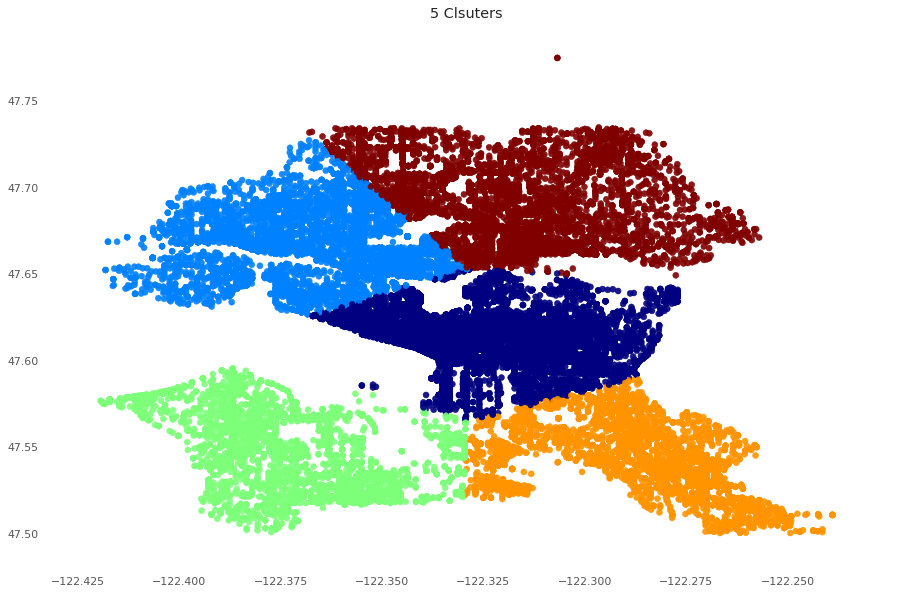

In [60]:
import matplotlib.pyplot as plt
import warnings
plt.style.use('ggplot')

kmeansvisual = predictions.toPandas()

fig, ax = plt.subplots()
ax.scatter(kmeansvisual['Longitude'], kmeansvisual['Latitude'], c=(kmeansvisual['prediction']),cmap=plt.cm.jet, alpha=0.9)
ax.set_title("5 Clsuters")
display()

In [61]:
kmeans = KMeans().setK(7).setSeed(1)
model = kmeans.fit(new_df)

# Make predictions
predictions = model.transform(new_df)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


Silhouette with squared euclidean distance = 0.6725548253058243
Cluster Centers: 
[ 47.60974041 -122.32821285]
[ 47.54476261 -122.28224946]
[ 47.7116113 -122.32847682]
[ 47.56198787 -122.38382295]
[ 47.66642545 -122.30928742]
[ 47.6654526 -122.36980999]
[ 47.53098121 -122.3499541 ]

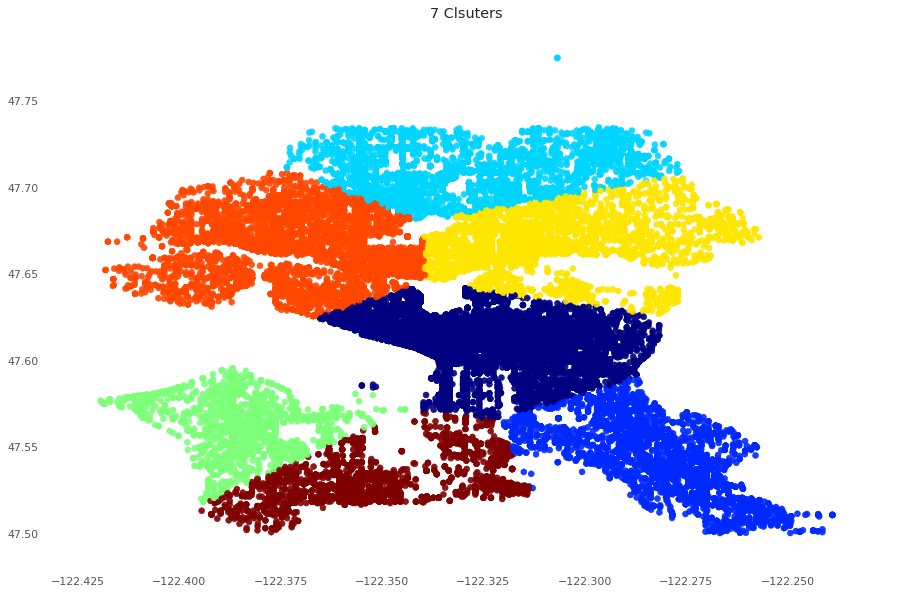

In [62]:
plt.style.use('ggplot')

kmeansvisual = predictions.toPandas()

fig, ax = plt.subplots()
ax.scatter(kmeansvisual['Longitude'], kmeansvisual['Latitude'], c=(kmeansvisual['prediction']),cmap=plt.cm.jet, alpha=0.9)
ax.set_title("7 Clsuters")
display()

In [63]:
kmeans = KMeans().setK(11).setSeed(1)
model = kmeans.fit(new_df)

# Make predictions
predictions = model.transform(new_df)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


Silhouette with squared euclidean distance = 0.5547070083978424
Cluster Centers: 
[ 47.71103639 -122.33895014]
[ 47.53644045 -122.27666649]
[ 47.67971012 -122.35872648]
[ 47.58897078 -122.30601463]
[ 47.56198655 -122.38380804]
[ 47.66272852 -122.38605028]
[ 47.66395764 -122.31265606]
[ 47.62781669 -122.34913821]
[ 47.61025354 -122.32868051]
[ 47.70956478 -122.29431195]
[ 47.53028978 -122.35014026]

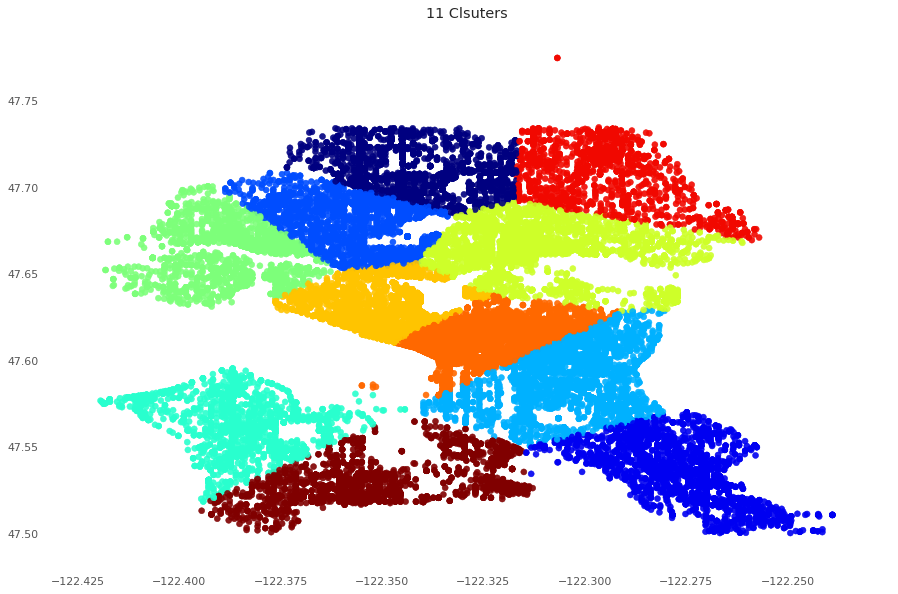

In [64]:
plt.style.use('ggplot')

kmeansvisual = predictions.toPandas()

fig, ax = plt.subplots()
ax.scatter(kmeansvisual['Longitude'], kmeansvisual['Latitude'], c=(kmeansvisual['prediction']),cmap=plt.cm.jet, alpha=0.9)
ax.set_title("11 Clsuters")
display()